In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
!mkdir DataSet
!unzip ./gdrive/My\ Drive/nascon/Train.csv.zip -d DataSet
!unzip ./gdrive/My\ Drive/nascon/Test.csv.zip -d DataSet

Archive:  ./gdrive/My Drive/nascon/Train.csv.zip
  inflating: DataSet/Train.csv       
Archive:  ./gdrive/My Drive/nascon/Test.csv.zip
  inflating: DataSet/Test.csv        


In [0]:
!ls DataSet

Test.csv  Train.csv


In [0]:
%pylab inline
import scipy.stats
from collections import defaultdict
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
%load_ext autoreload 
%autoreload 2
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D, Conv3D, MaxPooling3D, ZeroPadding3D
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2
from keras.utils import np_utils
from keras.models import model_from_json

Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.


In [0]:
data=pd.read_csv('./DataSet/Train.csv')
print data.describe()
print data.columns

              raw_0         raw_1         raw_2         raw_3         raw_4  \
count  46134.000000  46245.000000  46107.000000  46078.000000  46042.000000   
mean     123.913773    129.869781    121.405557    135.749078    118.019113   
std       62.177844     67.735543     59.393345     66.367796     58.679947   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       77.000000     77.000000     78.000000     84.000000     74.000000   
50%      122.000000    128.000000    118.000000    134.000000    116.000000   
75%      168.000000    181.000000    161.000000    187.000000    158.000000   
max      255.000000    255.000000    255.000000    255.000000    255.000000   

              raw_5         raw_6         raw_7         raw_8         raw_9  \
count  46108.000000  46087.000000  46181.000000  46089.000000  46110.000000   
mean     119.762449    132.968147    134.228102    123.466532    134.038213   
std       59.169917     63.933190     65.342831    

In [0]:
Y=data['label']

In [0]:
train=pd.read_csv('./DataSet/Train.csv')
test=pd.read_csv('./DataSet/Test.csv')
normalized_train=train.copy()
normalized_train=normalized_train.drop(normalized_train.iloc[:,368:1392],axis=1)
normalized_train=normalized_train.interpolate()
normalized_train=normalized_train.dropna()
labels=normalized_train.label



In [0]:
ndf=normalized_train.iloc[:,0:368].copy()
ndf = np.array(ndf)
ndfs = np.square(ndf)
ndfc = np.power(ndf,3)
ndf = np.hstack((ndf,ndfs,ndfc))
print ndf.shape

(48498, 1104)


In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(ndf,labels,test_size=0.3)

In [0]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(X_train)
model = LinearRegression()
model.fit(x_poly, Y_train)
# y_poly_pred = model.predict(x_poly)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  """Entry point for launching an IPython kernel.


Text(0.5,1,'Frequency of different class examples')

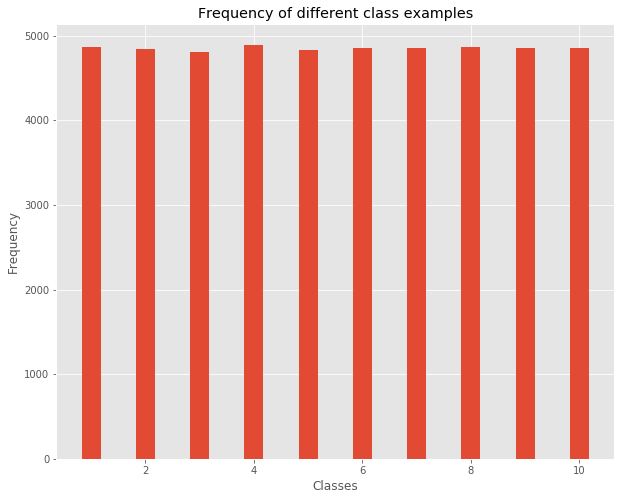

In [0]:
#First plot the frequency of each class...
freq=scipy.stats.itemfreq(Y)# Get frequency of each class....
plt.bar(np.arange(1,len(freq[:,1])+1),freq[:,1],width=0.35)
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.title('Frequency of different class examples')

In [0]:
# Get data in matrix
# X=np.asarray(data.ix[:,1:-1].dropna())
# print X.shape
# Y=np.asarray(data.ix[:,-1])
# print Y, Y.shape, len(np.unique(Y))
# data = data.fillna(data.mean(axis=0))
from sklearn.model_selection import train_test_split
data=data.drop(data.iloc[:,368:1392],axis=1)
data=data.interpolate()
# normalized_train=normalized_train.dropna(
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:368], Y, test_size=0.33)

In [0]:
print X_train.columns
print X_train.shape
X_train=np.array(X_train)
y_train = np.array(y_train)
y_train = np_utils.to_categorical(y_train, 10)
X_test = np.array(X_test)
y_test = np.array(y_test)
y_test = np_utils.to_categorical(y_test, 10)

img_rows = 16
img_cols = 23
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Index([u'raw_0', u'raw_1', u'raw_2', u'raw_3', u'raw_4', u'raw_5', u'raw_6',
       u'raw_7', u'raw_8', u'raw_9',
       ...
       u'GLCM_14', u'GLCM_15', u'GLCM_16', u'GLCM_17', u'GLCM_18', u'GLCM_19',
       u'GLCM_20', u'GLCM_21', u'GLCM_22', u'GLCM_23'],
      dtype='object', length=368)
(32495, 368)


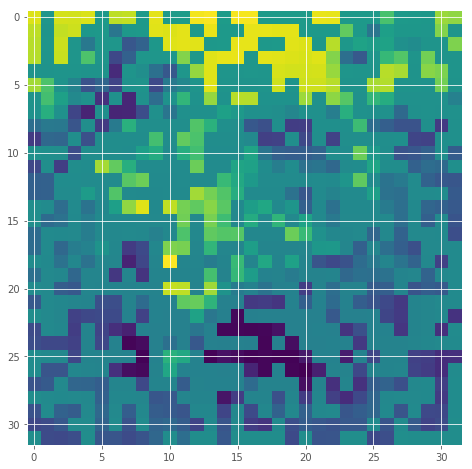

None


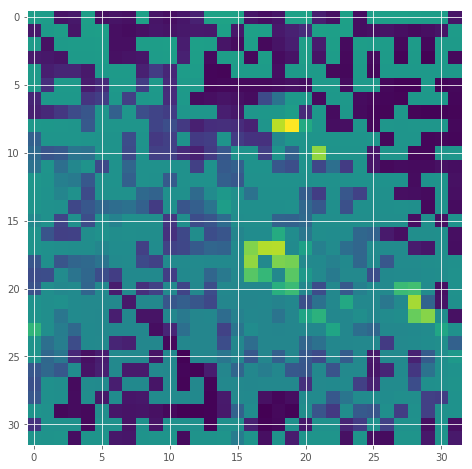

In [0]:
a = X_train[5].reshape(32,32)
b = X_train[2].reshape(32,32)

from matplotlib import pyplot as plt
plt.imshow(a, interpolation='nearest')
print plt.show()
plt.imshow(b, interpolation='nearest')
plt.show()

In [0]:
X = []
# for i in range(X_train.shape[0]):
#   f = X_train[i].reshape(32,32)
#   X.append(f)
# X = np.array(X)

In [0]:
print X

[]


## Neural Network model


In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D, Reshape
from keras.optimizers import SGD



print model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 14, 21, 32)        320       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 12, 19, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 9, 64)          0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 6, 9, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 3456)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 128)               442496    
_________________________________________________________________
dropout_14 (Dropout)         (None, 128)               0         
__________

In [0]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [0]:

print y_train.shape,X_train.shape
# adam = keras.optimizers.Adam(lr = 0.00001)
# model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['acc'])
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# model.fit(X_train, y_train, batch_size=64, epochs=10, validation_data=(X_test,y_test), shuffle=True)
# model.compile(loss='binary_crossentropy',
#               optimizer='rmsprop',
#               metrics=['accuracy'])

# model.fit(X_train, y_train, batch_size=16, epochs=10)
# score = model.evaluate(x_test, y_test, batch_size=16)
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

(32495, 10) (32495, 16, 23, 1)
Train on 32495 samples, validate on 16005 samples
Epoch 1/10
32495/32495 [==============================] - 14s 427us/step - loss: 2.1742 - acc: 0.1890 - val_loss: 2.3037 - val_acc: 0.0973
Epoch 2/10
32495/32495 [==============================] - 11s 345us/step - loss: 2.3030 - acc: 0.1013 - val_loss: 2.3031 - val_acc: 0.0973
Epoch 3/10
 7168/32495 [=====>........................] - ETA: 7s - loss: 2.3025 - acc: 0.1002

KeyboardInterrupt: ignored

In [0]:
results = model.predict_classes(X_test)
# pred = np.argmax(results, axis=1)
y = np.argmax(y_test, axis=1)
print np.sum(results==y)/float(len(y))
# score, acc = model.evaluate(X_test, y_test, batch_size=16)
# print('Test score:', score)
# print('Test accuracy:', acc)

0.408622305529522


# GradBoost

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import sklearn
from sklearn.model_selection import GridSearchCV


In [0]:
train=pd.read_csv('./DataSet/Train.csv')
test=pd.read_csv('./DataSet/Test.csv')


In [0]:
normalized_train=train.copy()
normalized_train=normalized_train.drop(normalized_train.iloc[:,368:1392],axis=1)
normalized_train=normalized_train.interpolate()
normalized_train=normalized_train.dropna()
labels=normalized_train.label

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(normalized_train.ilo[:,0:368],labels,test_size=0.3)

In [0]:
from xgboost import XGBClassifier
xgbcl = XGBClassifier(n_estimators=100,max_depth=4,verbosity=3,n_jobs=-1,learning_rate=0.5)
xgbcl.fit(X_train, Y_train)
pred=xgbcl.predict(X_test)
print sklearn.metrics.accuracy_score(Y_test.values,pred)


0.5285910652920962


In [0]:
normalized_train.columns

Index([u'raw_0', u'raw_1', u'raw_2', u'raw_3', u'raw_4', u'raw_5', u'raw_6',
       u'raw_7', u'raw_8', u'raw_9',
       ...
       u'GLCM_15', u'GLCM_16', u'GLCM_17', u'GLCM_18', u'GLCM_19', u'GLCM_20',
       u'GLCM_21', u'GLCM_22', u'GLCM_23', u'label'],
      dtype='object', length=369)

In [0]:
ndf=normalized_train.iloc[:,0:368].copy()
ndf['xg']=xgbcl.predict(ndf)

,raw_0,raw_1,raw_2,raw_3,raw_4,raw_5,raw_6,raw_7,raw_8,raw_9,...,GLCM_15,GLCM_16,GLCM_17,GLCM_18,GLCM_19,GLCM_20,GLCM_21,GLCM_22,GLCM_23,xg
2,45.0,239.0,66.0,252.0,140.0,63.0,249.0,250.0,33.0,248.0,...,0.047048,0.790219,0.002214,319.633333,12.100000,0.088411,0.049826,0.855383,0.002483,9.0
3,126.0,239.0,137.0,243.5,120.0,128.0,102.0,225.0,125.0,238.0,...,0.050260,0.851072,0.002526,236.862500,11.520833,0.094054,0.050346,0.789885,0.002535,7.0
4,226.0,222.0,153.0,235.0,171.0,148.0,231.0,231.0,225.0,229.0,...,0.050346,0.875646,0.002535,720.466667,16.183333,0.133303,0.051539,0.890142,0.002656,8.0
5,169.0,81.0,100.0,44.0,104.0,93.0,35.0,65.0,170.0,89.0,...,0.047048,0.711023,0.002214,433.141667,13.550000,0.101400,0.049036,0.902981,0.002405,4.0
6,154.0,145.0,76.0,134.0,175.0,53.0,134.0,141.0,147.0,148.0,...,0.050260,0.852472,0.002526,325.300000,12.533333,0.122460,0.050173,0.910305,0.002517,1.0
7,77.0,35.0,105.0,108.0,112.0,107.0,173.0,79.0,88.0,53.0,...,0.047690,0.856955,0.002274,1002.316667,23.733333,0.058546,0.047871,0.844166,0.002292,5.0
8,104.0,55.0,113.0,90.0,107.0,124.0,79.0,88.0,115.0,72.0,...,0.053359,0.888191,0.002847,185.091667,9.266667,0.112188,0.049826,0.901720,0.002483,4.0
9,97.0,253.0,255.0,251.0,141.0,255.0,248.0,252.0,51.0,255.0,...,0.048143,0.853129,0.002318,1013.541667,17.600000,0.226261,0.092327,0.924492,0.008524,9.0
10,224.0,227.0,84.0,214.0,57.0,37.0,215.0,218.0,207.0,214.0,...,0.048052,0.869933,0.002309,1220.070833,21.679167,0.114511,0.048858,0.798455,0.002387,9.0
11,153.0,13.0,51.0,50.0,58.0,48.0,21.0,13.0,21.0,12.0,...,0.056596,0.927067,0.003203,1356.254167,19.379167,0.174106,0.058704,0.869596,0.003446,5.0


In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(ndf,labels,test_size=0.3)

In [0]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(max_depth=8,n_estimators=50)
forest.fit(X_train,Y_train)
ypred6=forest.predict(X_test)
print (sklearn.metrics.accuracy_score(Y_test.values,ypred6))

0.547766323024055


In [0]:
from sklearn.ensemble import ExtraTreesClassifier
et=ExtraTreesClassifier(max_depth=15,n_estimators=200)
et.fit(X_train,Y_train)
ypred0=et.predict(X_test)
print (sklearn.metrics.accuracy_score(Y_test.values,ypred0))


0.6692096219931272


In [0]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=50,learning_rate=0.5)
ada.fit(X_train,Y_train)
ypred8=ada.predict(X_test)
print (sklearn.metrics.accuracy_score(Y_test.values,ypred8))

0.7678350515463918


In [0]:
tst=test.iloc[:,0:368].interpolate()
tst['xg']=xgbcl.predict(tst)
# tst.isna().sum()
arr=ada.predict(tst)
# arr.DataFrame('bagging.csv',index=True)

In [0]:
arr=arr.astype(int)
pd.DataFrame(arr).to_csv('bagging.csv',index=True)

In [0]:
parameters = {
    "learning_rate": [0.3, 0.5],
    "max_depth":[3,5,7],
    "n_estimators":[100,150]
    }
clf = GridSearchCV(XGBClassifier(), parameters, cv=2, n_jobs=-1,verbose=8)
clf.fit(X_train, Y_train)
print(clf.score(X_train, Y_train))
print(clf.best_params_)



Fitting 2 folds for each of 12 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  9.0min


In [0]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.5,max_depth=3, random_state=0)
clf.fit(X_train, Y_train)
pred=clf.predict(X_test)
print (sklearn.metrics.accuracy_score(Y_test.values,pred))


# Ensembling

In [0]:
!pip install mlens

    100% |████████████████████████████████| 235kB 8.8MB/s 


In [0]:
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from mlens.ensemble import SuperLearner 
from sklearn.metrics import f1_score
import sklearn
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import sklearn
from sklearn.model_selection import GridSearchCV





[MLENS] backend: threading


In [0]:
train=pd.read_csv('./DataSet/Train.csv')
test=pd.read_csv('./DataSet/Test.csv')


In [0]:
normalized_train=train.copy()
normalized_train=normalized_train.drop(normalized_train.iloc[:,368:1392],axis=1)
normalized_train=normalized_train.interpolate()
normalized_train=normalized_train.dropna()
labels=normalized_train.label

In [0]:
ndf=normalized_train.iloc[:,0:368].copy()
ndf = np.array(ndf)
ndfs = np.square(ndf)
ndfc = np.power(ndf,3)
ndf = np.hstack((ndf,ndfs,ndfc))
print ndf.shape

(48498, 1104)


In [0]:
from sklearn.model_selection import train_test_split
#standardizing the input feature
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
ndf = sc.fit_transform(ndf)
X_train,X_test,Y_train,Y_test=train_test_split(ndf,labels,test_size=0.3)

In [0]:
# y_train = np_utils.to_categorical(Y_train, 10)
# y_test = np_utils.to_categorical(Y_test, 10)
from keras.callbacks import EarlyStopping
n_cols = X_train.shape[1]
#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=3)
model_mc = Sequential()
#add model layers
model_mc.add(Dense(200, activation='relu', input_shape=(n_cols,)))
model_mc.add(Dense(200, activation='relu'))
model_mc.add(Dense(200, activation='relu'))
model_mc.add(Dense(10))

#compile model using mse as a measure of model performance
model_mc.compile(optimizer='adam', loss='mean_squared_error')
#train model
model_mc.fit(X_train, y_train, validation_split=0.2, epochs=30, callbacks=[early_stopping_monitor])

Train on 27158 samples, validate on 6790 samples
Epoch 1/30
27158/27158 [==============================] - 11s 393us/step - loss: 0.0837 - val_loss: 0.0716
Epoch 2/30
27158/27158 [==============================] - 9s 346us/step - loss: 0.0673 - val_loss: 0.0688
Epoch 3/30
27158/27158 [==============================] - 10s 366us/step - loss: 0.0620 - val_loss: 0.0671
Epoch 4/30
27158/27158 [==============================] - 10s 381us/step - loss: 0.0581 - val_loss: 0.0665
Epoch 5/30
27158/27158 [==============================] - 10s 372us/step - loss: 0.0543 - val_loss: 0.0659
Epoch 6/30
27158/27158 [==============================] - 10s 360us/step - loss: 0.0510 - val_loss: 0.0660
Epoch 7/30
27158/27158 [==============================] - 10s 352us/step - loss: 0.0475 - val_loss: 0.0676
Epoch 8/30
27158/27158 [==============================] - 10s 368us/step - loss: 0.0442 - val_loss: 0.0683


In [0]:
pred = model_mc.predict_classes(X_test)
print np.sum(pred==Y_test)/float(len(Y_test))

0.49876288659793816


In [0]:
from xgboost import XGBClassifier
xgbcl = XGBClassifier(n_estimators=200,max_depth=4,verbosity=3,learning_rate=0.3)
xgbcl.fit(X_train, Y_train)
pred=xgbcl.predict(X_test)
print sklearn.metrics.accuracy_score(Y_test.values,pred)


In [0]:
# ndf=normalized_train.iloc[:,0:368].copy()
# ndf['pixel']=ndf.iloc[:,0:200].mean(axis=1)
# ndf['gmean']=ndf.iloc[:,344:368].mean(axis=1)
# ndf=ndf.drop(ndf.iloc[:,344:368],axis=1)


In [0]:
ndf.iloc[:,:368].columns

Index([u'raw_0', u'raw_1', u'raw_2', u'raw_3', u'raw_4', u'raw_5', u'raw_6',
       u'raw_7', u'raw_8', u'raw_9',
       ...
       u'hog_136', u'hog_137', u'hog_138', u'hog_139', u'hog_140', u'hog_141',
       u'hog_142', u'hog_143', u'pixel', u'gmean'],
      dtype='object', length=346)

In [0]:
ada=AdaBoostClassifier(n_estimators=100,learning_rate=0.5)
et=ExtraTreesClassifier(max_depth=8,n_estimators=50)
rf=RandomForestClassifier(max_depth=8,n_estimators=50)

xgbcl = XGBClassifier(n_estimators=100,max_depth=3,n_jobs=-1,learning_rate=0.5)
et2=ExtraTreesClassifier(max_depth=5,n_estimators=50)



lr = LogisticRegression(solver='lbfgs',multi_class='auto',max_iter=250)

base_learners = [
    ('et', et), ('rf', rf), ('xg', xgbcl)

]


base_learner2 = [
    ('lr',lr), ('ada', ada)
]

meta_learner=XGBClassifier(n_estimators=50,max_depth=5,n_jobs=-1,learning_rate=0.1)

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(ndf,labels,test_size=0.3)

In [0]:
# features=[]
# for i in range(344,368,1):
#   features.append(i)
# print features 
print X_train.shape

(33948, 736)


In [0]:
ensemble = SuperLearner(scorer=sklearn.metrics.accuracy_score,verbose=3)

# First layer
ensemble.add(base_learners)
ensemble.add(base_learner2)

# Final meta estimator
ensemble.add_meta(meta_learner)
# Train ensemble
ensemble.fit(X_train, Y_train)



Fitting 3 layers
Processing layer-1            
Learners ...                   et.0.1                         done | 00:00:03
et.0.0                         done | 00:00:06
et.0.2                         done | 00:00:03
rf.0.1                         done | 00:00:11
rf.0.0                         done | 00:00:22
rf.0.2                         done | 00:00:11
xg.0.1                         done | 00:06:30
xg.0.0                         done | 00:12:45
xg.0.2                         done | 00:06:23done | 00:13:23

layer-1                        done | 00:13:23


TypeError: ignored

In [0]:
pred=ensemble.predict(X_test)
print (sklearn.metrics.accuracy_score(Y_test.values,pred))



Predicting 3 layers
Processing layer-1            
Learners ...                   rf.0.0                         done | 00:00:00
et.0.0                         done | 00:00:00
xg.0.0                         done | 00:00:00
done | 00:00:01
layer-1                        done | 00:00:01
Processing layer-2            
Learners ...                   lr.0.0                         done | 00:00:00
ada.0.0                        done | 00:00:00
done | 00:00:00
layer-2                        done | 00:00:00
Processing layer-3            
Learners ...                   xgbclassifier.0.0              done | 00:00:00
done | 00:00:00
layer-3                        done | 00:00:00
Predict complete                    | 00:00:02
0.5168384879725086


In [0]:
# Example of hard voting 
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
clf = [rf, et, knn, svc, rg]
eclf = VotingClassifier(estimators=[('Random Forests', rf), ('Extra Trees', et), ('SVC', svc), ('Ridge Classifier', rg)], voting='hard')
for clf, label in zip([rf, et, knn, svc, rg, eclf], ['Random Forest', 'Extra Trees', 'SVC', 'Ridge Classifier', 'Ensemble']):
    scores = cross_val_score(clf, X_train, Y_train, cv=10, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))


In [0]:
from xgboost import XGBClassifier
xgbcl = XGBClassifier(n_estimators=50,max_depth=4,verbosity=True,n_jobs=-1,learning_rate=0.5)
xgbcl.fit(X_train.iloc[:,0:144], Y_train)
pred=xgbcl.predict(X_test.iloc[:,0:144])
print sklearn.metrics.accuracy_score(Y_test.values,pred)


0.4149828178694158


In [0]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="log", penalty="l1", max_iter=500,verbose=1,shuffle=True)
clf.fit(X_train, Y_train)
pred=clf.predict(X_test)
print sklearn.metrics.accuracy_score(Y_test.values,pred)



Norm: 9341.92, NNZs: 285, Bias: -23.103494, T: 15174756, Avg. loss: 164.320271
Total training time: 46.74 seconds.
-- Epoch 448
Norm: 9342.06, NNZs: 291, Bias: -23.145249, T: 15208704, Avg. loss: 165.091830
Total training time: 46.85 seconds.
-- Epoch 449
Norm: 9342.21, NNZs: 283, Bias: -23.186817, T: 15242652, Avg. loss: 163.430314
Total training time: 46.96 seconds.
-- Epoch 450
Norm: 9342.35, NNZs: 286, Bias: -23.214127, T: 15276600, Avg. loss: 164.778310
Total training time: 47.07 seconds.
-- Epoch 451
Norm: 9342.49, NNZs: 291, Bias: -23.246118, T: 15310548, Avg. loss: 166.093764
Total training time: 47.18 seconds.
-- Epoch 452
Norm: 9342.62, NNZs: 294, Bias: -23.274253, T: 15344496, Avg. loss: 170.404320
Total training time: 47.29 seconds.
-- Epoch 453
Norm: 9342.75, NNZs: 285, Bias: -23.313425, T: 15378444, Avg. loss: 167.507868
Total training time: 47.40 seconds.
-- Epoch 454
Norm: 9342.90, NNZs: 282, Bias: -23.335763, T: 15412392, Avg. loss: 160.887408
Total training time: 47.5

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  8.8min finished


In [0]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='sag',multi_class='auto',verbose=1,max_iter=50)
clf.fit(X_train, Y_train)
pred=clf.predict(X_test)
print sklearn.metrics.accuracy_score(Y_test.values,pred)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 32 seconds
0.3024742268041237


/usr/local/lib/python2.7/dist-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   32.1s finished


In [0]:
import numpy as np

In [0]:
np.square(np.array([1,2,3,4]))

array([ 1,  4,  9, 16])